In [1]:
import pip
pip.main(['install','seaborn']);

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#output_path = 'C:\\Users\\Anna\\Metacity\\Metacity-SynthPop\\output\\png\\'
output_path = "/home/metamat/anicka/Metacity-SynthPop/output/png/"

## Population Output - MATSim input

In [4]:
df_persons = pd.read_csv(output_path+'../csv/df_persons.csv', index_col=[0])
df_persons.set_index("person_id", drop=True, inplace=True)
df_activities = pd.read_csv(output_path+'../csv/df_activities.csv', index_col=[0])
df_trips = pd.read_csv(output_path+'../csv/df_trips.csv', index_col=[0])

df_activities["o_order"] = df_activities.activity_order.values
df_activities["d_order"] = df_activities.activity_order.values
df_trips["o_order"] = df_trips.trip_order
df_trips["d_order"] = df_trips.trip_order + 1
df_joined_origin = df_activities.merge(df_trips, on=["person_id", "o_order"])
df_joined_dest = df_activities.merge(df_trips, on=["person_id", "d_order"])

df_activities = df_activities.merge(df_persons, on="person_id")
#df_merged = df_persons.merge(df_activities, on="person_id")


traveler_ids = df_activities.person_id.unique()

display(df_persons.head(2))
display(df_activities.head(2))
display(df_trips.head(2))

,trip_today,car_avail,driving_license
person_id,,,
1,True,False,False
231704,True,False,False


,person_id,purpose,start_time,end_time,activity_order,geometry,location_id,duration_m,departure_order,o_order,d_order,trip_today,car_avail,driving_license
0,1,home,NaN,32138.0,0,POINT (741081.2944470095 1053674.974826472),14165,NaN,-1,0,0,True,False,False
1,1,work,34624.0,54725.0,1,POINT (737592.1799999997 1041624.149999999),NaN,335.016667,0,1,1,True,False,False


,person_id,mode,trip_order,start,preceeding_purpose,preceeding_purpose_coords,end,following_purpose,following_purpose_coords,travel_time,beeline,trip_id,o_order,d_order
0,1,pt,0,32138.0,home,POINT (741081.2944470095 1053674.974826472),34624.0,work,POINT (737592.1799999997 1041624.149999999),2486.0,12545.768156,0,0,1
1,1,pt,1,54725.0,work,POINT (737592.1799999997 1041624.149999999),57210.0,home,POINT (741081.2944470095 1053674.974826472),2485.0,12545.768156,1,1,2


In [5]:
travelers = df_activities.groupby("person_id")

In [6]:
display(df_trips[df_trips.beeline > 1200000].head())
print(len(df_trips[df_trips.beeline > 1200000].person_id.unique()))
#df_trips = df_trips[df_trips.following_purpose_coords != Point(1,1)]

display(df_activities[df_activities.duration_m > 1400].head())
print(len(df_activities[df_activities.duration_m > 1400].person_id.unique()))

,person_id,mode,trip_order,start,preceeding_purpose,preceeding_purpose_coords,end,following_purpose,following_purpose_coords,travel_time,beeline,trip_id,o_order,d_order


0


,person_id,purpose,start_time,end_time,activity_order,geometry,location_id,duration_m,departure_order,o_order,d_order,trip_today,car_avail,driving_license


0


education


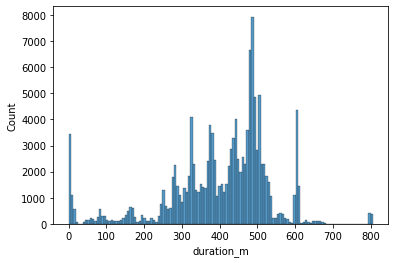

home


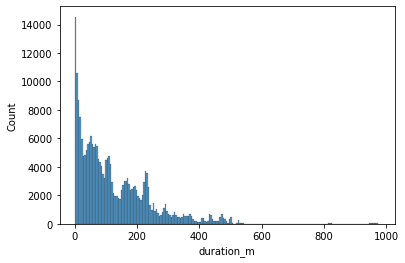

leisure


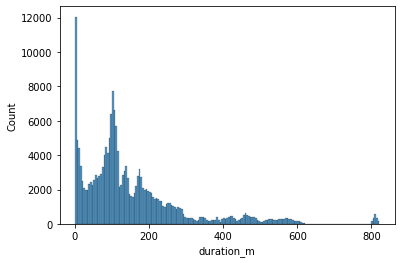

other


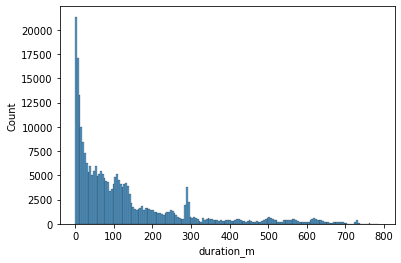

shop


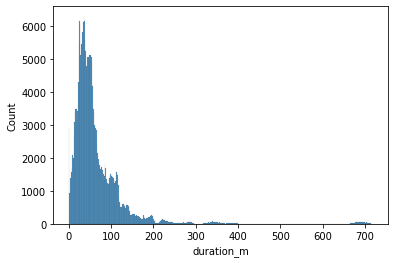

work


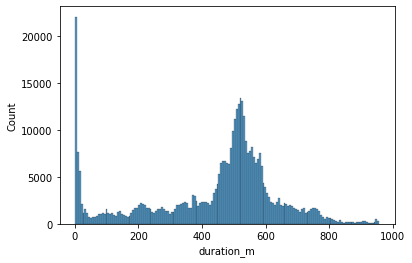

In [7]:
for mode, df in df_activities.groupby('purpose'):
    print(mode)
    sns.histplot(df.duration_m)
    plt.show()

education


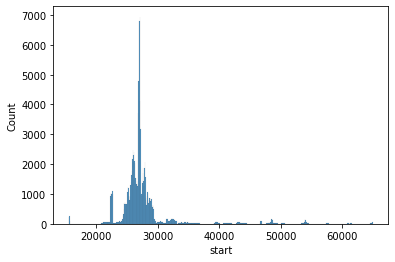

home


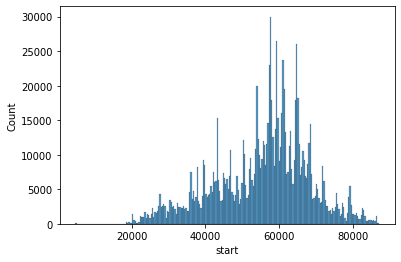

leisure


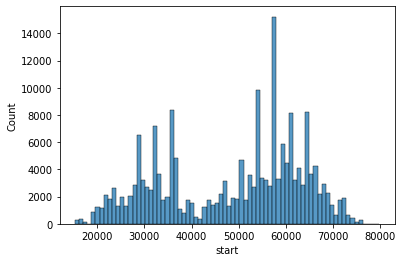

other


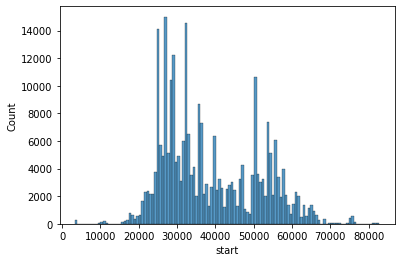

shop


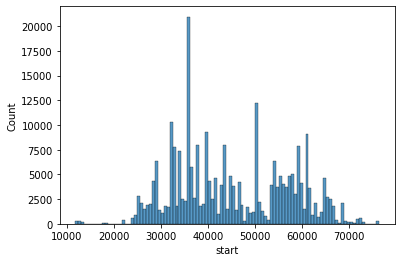

work


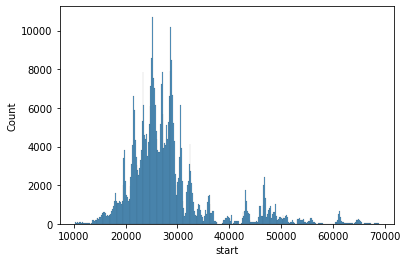

In [8]:
for mode, df in df_trips.groupby('following_purpose'):
    print(mode)
    sns.histplot(df.start)
    plt.show()

bike
0.0 23.07577076177405


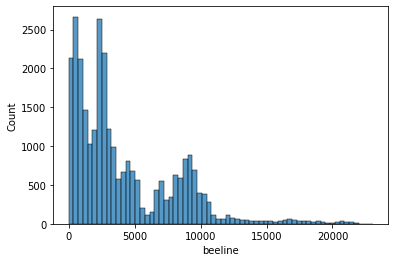

car
0.0 30.059403180493433


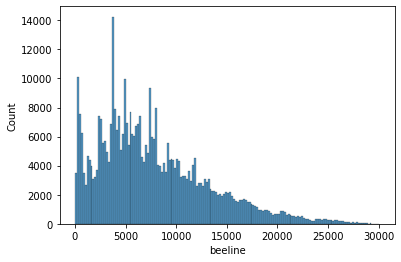

pt
0.0 29.94876139357921


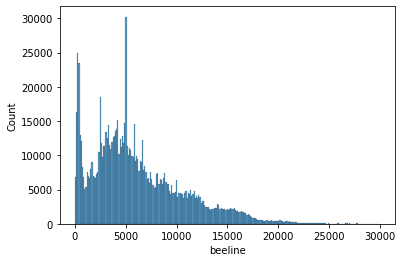

ride
0.0 29.24532099942716


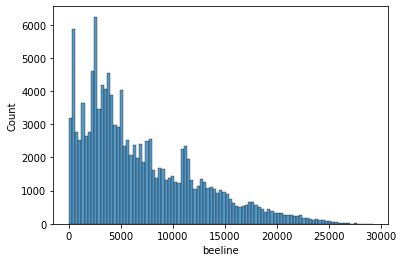

walk
0.0 26.7906242624652


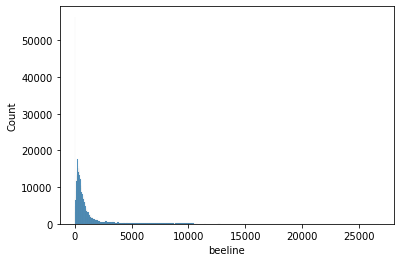

In [9]:
for mode, df in df_trips.groupby('mode'):
    print(mode)
    print(df.beeline.min()/1000, df.beeline.max()/1000)
    sns.histplot(df.beeline)
    plt.show()

In [10]:
df_count = [[i, df.shape[0]] for i, df in travelers]
df_count = pd.DataFrame(columns=["person_id", "activity_count"], data=df_count)
df_count.set_index("person_id", inplace=True, drop=True)
display(df_count.head(2))

,activity_count
person_id,
1,3
2,3


In [11]:
df_persons["activity_count"] = df_persons.merge(df_count, on="person_id").activity_count.values

In [12]:
display(df_persons.head(2))

,trip_today,car_avail,driving_license,activity_count
person_id,,,,
1,True,False,False,3
231704,True,False,False,3


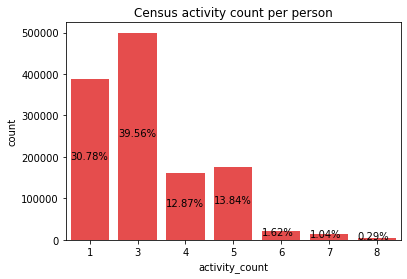

In [13]:
#only one trip
g = sns.countplot(x="activity_count", color="red", alpha=0.8,data=df_persons)
g.set_title("Census activity count per person")
for p in g.patches:
    txt = str((p.get_height()/df_persons.shape[0]*100).round(2)) + '%'
    #txt = str((p.get_height()).round(0)) + '#'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

plt.savefig(output_path+'census_activity_count_perc.png')

In [14]:
# alespon jedna cesta
print("More than one activity:",df_persons[df_persons.activity_count > 1].shape[0])
print("No travel:",df_persons[df_persons.activity_count <= 1].shape[0])

More than one activity: 873687
No travel: 388583


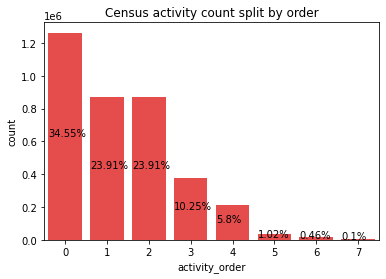

In [15]:
g = sns.countplot(x="activity_order", color="red", alpha=0.8,data=df_activities)
g.set_title("Census activity count split by order")
for p in g.patches:
    txt = str((p.get_height()/df_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

plt.savefig(output_path+'census_activity_count_order.png')

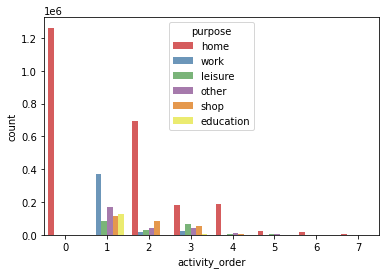

In [16]:
g = sns.countplot(x="activity_order", hue="purpose", palette="Set1", alpha=0.8,data=df_activities)

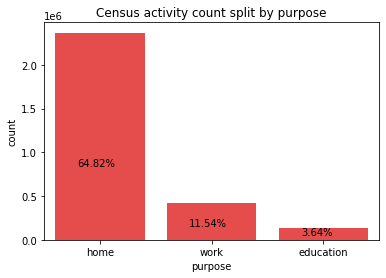

In [17]:
g = sns.countplot(x="purpose", order=['home','work','education'], color="r", alpha=0.8, data=df_activities)
g.set_title("Census activity count split by purpose")
for p in g.patches:
    txt = str((p.get_height()/df_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height()/2.8
    g.text(txt_x,txt_y,txt)

plt.savefig(output_path+'census_activity_count_purpose.png')

In [18]:
purposes_org = df_joined_origin.groupby("purpose")

for p, df in purposes_org:
    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','ride','bike'], palette="Set1", alpha=0.8, data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Origin purpose: "+str(p))
    plt.show()

ValueError: Could not interpret input 'traveling_mode'

In [ ]:
purposes_dest = df_joined_dest.groupby("purpose")

for p, df in purposes_dest:
    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','ride','bike'], palette="Set1", alpha=0.8, data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Census travel mode split by destination purpose - "+str(p))
    plt.savefig(output_path+'census_'+str(p)+'_dest_tm.png')
    plt.show()